# PCA. Снижение размерности пространства признаков

## Импорт набора данных и необходимых библиотек


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/bottle.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74156 entries, 0 to 74155
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cst_Cnt              74156 non-null  int64  
 1   Btl_Cnt              74156 non-null  int64  
 2   Sta_ID               74156 non-null  object 
 3   Depth_ID             74156 non-null  object 
 4   Depthm               74156 non-null  int64  
 5   T_degC               73684 non-null  float64
 6   Salnty               66837 non-null  float64
 7   O2ml_L               66744 non-null  float64
 8   STheta               66515 non-null  float64
 9   O2Sat                61058 non-null  float64
 10  Oxy_µmol/Kg          61058 non-null  float64
 11  BtlNum               0 non-null      float64
 12  RecInd               74156 non-null  int64  
 13  T_prec               73684 non-null  float64
 14  T_qual               653 non-null    float64
 15  S_prec               66837 non-null 

## Визуализация некоторых признаков

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='O2ml_L', ylabel='O2Sat'>

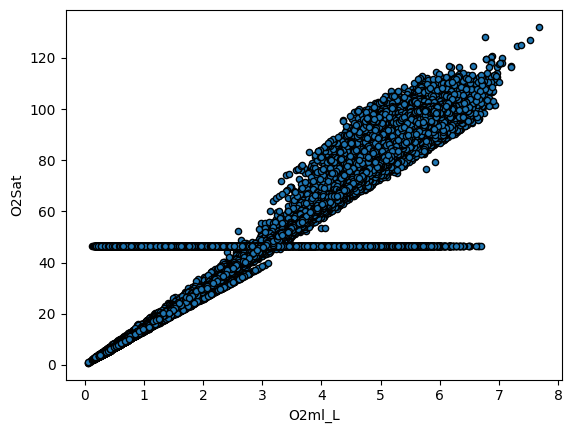

In [ ]:
df.plot(kind="scatter", x="O2ml_L", y="O2Sat", edgecolors='black')

<Axes: xlabel='Depthm', ylabel='R_DYNHT'>

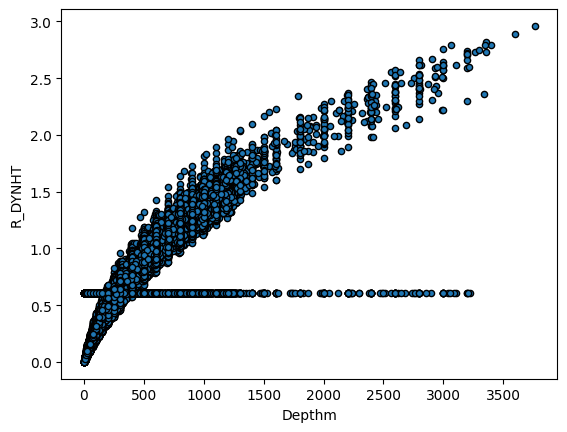

In [ ]:
df.plot(kind="scatter", x="Depthm", y="R_DYNHT", edgecolors='black')

<Axes: xlabel='STheta', ylabel='O2Sat'>

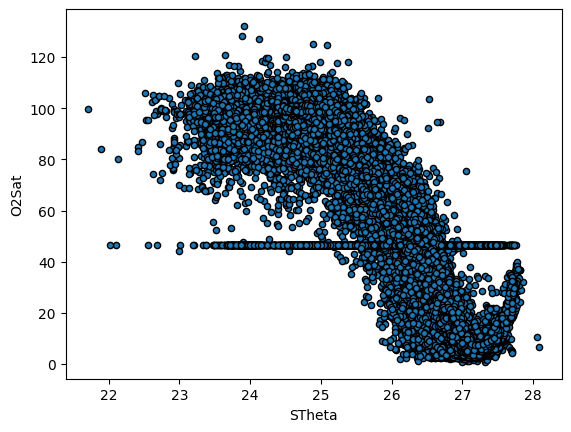

In [ ]:
df.plot(kind="scatter", x="STheta", y="O2Sat", edgecolors='black')

## Подготовка данных

In [ ]:
df=df.drop(["Sta_ID", "Depth_ID", "IncTim", "DIC Quality Comment", "T_degC"], axis=1)

In [ ]:
df=df.dropna(axis=1,how='all')

In [ ]:
df_null_values=df.isnull().sum()

In [ ]:
df_null_values[df_null_values > 0]

Salnty          7319
O2ml_L          7412
STheta          7641
O2Sat          13098
Oxy_µmol/Kg    13098
T_prec           472
T_qual         73503
S_prec          7319
S_qual         66307
O_qual         66326
SThtaq         65836
O2Satq         60197
PO4uM          33767
PO4q           40389
R_TEMP           472
R_POTEMP        7727
R_SALINITY      7319
R_SIGMA         8320
R_SVA           8320
R_DYNHT         7393
R_O2            7412
R_O2Sat        13163
R_PO4          33767
R_PRES             1
dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.head()

,Cst_Cnt,Btl_Cnt,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,...,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PO4,R_PRES
0,1,1,0,33.440,2.820626,25.649,46.44008,123.730076,3,1.0,...,10.50,10.50,33.440,25.64,233.0,0.00,2.820626,46.544531,2.016864,0.0
1,1,2,8,33.440,2.820626,25.656,46.44008,123.730076,3,2.0,...,10.46,10.46,33.440,25.65,232.5,0.01,2.820626,46.544531,2.016864,8.0
2,1,3,10,33.437,2.820626,25.654,46.44008,123.730076,7,2.0,...,10.46,10.46,33.437,25.65,232.8,0.02,2.820626,46.544531,2.016864,10.0
3,1,4,19,33.420,2.820626,25.643,46.44008,123.730076,3,2.0,...,10.45,10.45,33.420,25.64,234.1,0.04,2.820626,46.544531,2.016864,19.0
4,1,5,20,33.421,2.820626,25.643,46.44008,123.730076,7,2.0,...,10.45,10.45,33.421,25.64,234.0,0.04,2.820626,46.544531,2.016864,20.0


### Нормализация данных

In [ ]:
#разделяем датафрейм на признаки и целевую переменную, потому что нормализовать будем только признаки
X = df.drop("R_TEMP", axis=1)
y = df["R_TEMP"]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

In [ ]:
X_std.head()

,Cst_Cnt,Btl_Cnt,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,...,R_Depth,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PO4,R_PRES
0,-1.713165,-1.732027,-0.942308,-0.850947,2.195471e-16,-0.451557,0.0,1.682717e-16,-1.090077,-8.580441,...,-0.942308,0.325048,-0.850947,-0.455937,0.415400,-1.342730,2.195471e-16,0.0,5.375806e-16,-0.940495
1,-1.713165,-1.731981,-0.921252,-0.850947,2.195471e-16,-0.444754,0.0,1.682717e-16,-1.090077,0.014698,...,-0.921252,0.315663,-0.850947,-0.446170,0.410118,-1.320719,2.195471e-16,0.0,5.375806e-16,-0.919637
2,-1.713165,-1.731934,-0.915988,-0.856909,2.195471e-16,-0.446698,0.0,1.682717e-16,0.917367,0.014698,...,-0.915988,0.315663,-0.856909,-0.446170,0.413288,-1.298709,2.195471e-16,0.0,5.375806e-16,-0.914423
3,-1.713165,-1.731887,-0.892299,-0.890696,2.195471e-16,-0.457388,0.0,1.682717e-16,-1.090077,0.014698,...,-0.892299,0.313317,-0.890696,-0.455937,0.427021,-1.254688,2.195471e-16,0.0,5.375806e-16,-0.890957
4,-1.713165,-1.731841,-0.889667,-0.888708,2.195471e-16,-0.457388,0.0,1.682717e-16,0.917367,0.014698,...,-0.889667,0.313317,-0.888708,-0.455937,0.425964,-1.254688,2.195471e-16,0.0,5.375806e-16,-0.888350


In [ ]:
y.head()

0    10.50
1    10.46
2    10.46
3    10.45
4    10.45
Name: R_TEMP, dtype: float64

In [ ]:
df = pd.concat([X_std, y], axis=1)

In [ ]:
#смотрим результат нормализации
print("mean: ", np.round(df.mean(), 2))
print("standard dev: ", np.round(df.std(), 2))

mean:  Cst_Cnt        0.00
Btl_Cnt        0.00
Depthm         0.00
Salnty         0.00
O2ml_L         0.00
STheta         0.00
O2Sat          0.00
Oxy_µmol/Kg   -0.00
RecInd         0.00
T_prec        -0.00
T_qual         0.00
S_prec         0.00
S_qual         0.00
P_qual         0.00
O_qual        -0.00
SThtaq         0.00
O2Satq         0.00
Chlqua         0.00
Phaqua         0.00
PO4uM          0.00
PO4q           0.00
SiO3qu         0.00
NO2q           0.00
NO3q           0.00
NH3q           0.00
C14A1q         0.00
C14A2q         0.00
DarkAq         0.00
MeanAq         0.00
R_Depth        0.00
R_POTEMP      -0.00
R_SALINITY     0.00
R_SIGMA        0.00
R_SVA         -0.00
R_DYNHT        0.00
R_O2           0.00
R_O2Sat       -0.00
R_PO4          0.00
R_PRES         0.00
R_TEMP         9.14
dtype: float64
standard dev:  Cst_Cnt        1.00
Btl_Cnt        1.00
Depthm         1.00
Salnty         1.00
O2ml_L         1.00
STheta         1.00
O2Sat          1.00
Oxy_µmol/Kg    1.00
Rec

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_std)

#генерируем имена для компонент
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
#присваиваем имена
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,-2.115092,0.542105,-0.765927,-3.822090,-1.717960,0.932623,7.926171,0.056451,-1.055470,-1.074504,...,-4.943060e-16,-6.976559e-16,-6.684238e-17,4.595597e-17,-3.922550e-16,-3.257549e-16,-5.329585e-16,3.893286e-17,-4.816989e-16,-6.657544e-16
1,-1.870343,0.295961,-1.023433,-2.388504,-2.057276,0.378191,-0.339188,-0.021526,-0.139083,0.355283,...,-1.901313e-16,-2.713301e-16,-2.544998e-17,1.588821e-17,-1.513528e-16,-1.269319e-16,-2.063388e-16,1.215461e-17,-1.848085e-16,-3.106673e-17
2,-1.689282,-0.381537,-2.620634,-0.106124,-1.988671,0.301275,0.124933,-0.102911,-0.241280,0.361051,...,-1.308066e-17,1.126455e-18,2.357286e-19,1.937831e-17,9.302106e-18,5.012647e-18,-1.589987e-17,9.089742e-18,-2.155087e-18,-2.349091e-15
3,-1.862577,0.297480,-1.035428,-2.397711,-2.000657,0.378713,-0.346241,-0.001083,-0.178260,0.360014,...,-9.147345e-16,4.645714e-16,9.144131e-17,-6.753302e-17,2.267356e-16,1.662242e-16,1.985779e-16,-1.237279e-16,1.770203e-16,-1.135485e-14
4,-1.683429,-0.380184,-2.630318,-0.113708,-1.941174,0.301863,0.119410,-0.086221,-0.273639,0.367011,...,5.368859e-17,1.478528e-16,-5.831272e-17,2.321626e-18,1.574596e-16,8.179331e-17,1.491999e-16,-3.494575e-17,-3.432244e-18,2.141469e-14


In [ ]:
X_pca.shape

(74156, 39)

In [ ]:
#функция для построения графика, сколько информации созраняют компоненты
def plot_variance(pca, width=8, dpi=100):
    
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
   
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

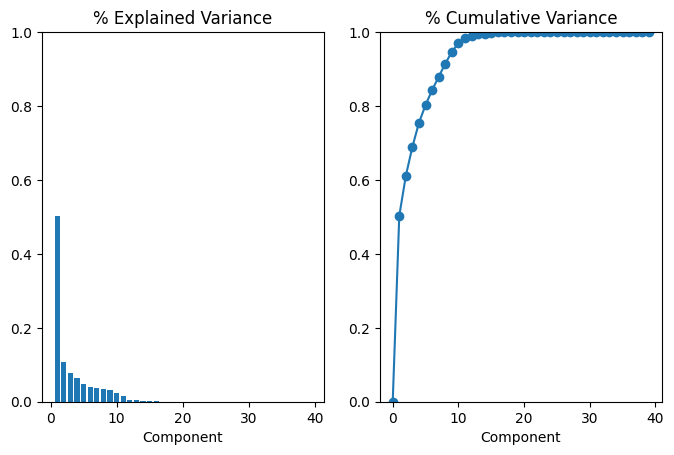

In [ ]:
#видим, что около 20 компонент суммарно сохраняют практически 100% информации
plot_variance(pca)

In [ ]:
#уменьшаем число компонент
X_pca = X_pca.drop(X_pca.columns[20:], axis=1)

In [ ]:
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-2.115092,0.542105,-0.765927,-3.822090,-1.717960,0.932623,7.926171,0.056451,-1.055470,-1.074504,0.649748,0.046734,0.428676,0.249911,0.038467,0.021911,-0.001939,-0.007919,0.003843,-0.019534
1,-1.870343,0.295961,-1.023433,-2.388504,-2.057276,0.378191,-0.339188,-0.021526,-0.139083,0.355283,0.715161,0.043877,0.395453,0.278696,0.044881,0.025989,0.000850,-0.027293,0.034031,-0.027554
2,-1.689282,-0.381537,-2.620634,-0.106124,-1.988671,0.301275,0.124933,-0.102911,-0.241280,0.361051,0.738409,0.039776,0.383147,0.306749,-0.026218,0.002857,-0.001024,-0.027600,0.035723,-0.027815
3,-1.862577,0.297480,-1.035428,-2.397711,-2.000657,0.378713,-0.346241,-0.001083,-0.178260,0.360014,0.757606,0.048909,0.344161,0.256706,0.044967,0.025050,-0.002312,-0.019806,0.029420,-0.027424
4,-1.683429,-0.380184,-2.630318,-0.113708,-1.941174,0.301863,0.119410,-0.086221,-0.273639,0.367011,0.773948,0.042923,0.349631,0.295014,-0.025951,0.002295,-0.002825,-0.023135,0.033061,-0.027625


## Обучение моделей

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:
#разделяем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=41)

In [ ]:
rf = RandomForestRegressor(random_state = 1)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
y_pred = rf.predict(X_test)
print("MSE: ",round(metrics.mean_squared_error(y_pred, y_test),4))
print("r2: ",round(metrics.r2_score(y_pred, y_test),4))

MSE:  0.0344
r2:  0.9983


In [ ]:
X_std.shape

(74156, 39)

In [ ]:
#теперь обучаем на данных, которые подверглись преобразованию PCA
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.25, random_state=41)

In [ ]:
X_pca_train.shape

(55617, 20)

In [ ]:
X_train.shape

(55617, 39)

In [ ]:
rf_pca = RandomForestRegressor(random_state = 1)
rf_pca.fit(X_pca_train, y_pca_train)

RandomForestRegressor(random_state=1)

In [ ]:
y_pred = rf_pca.predict(X_pca_test)
print(round(metrics.mean_squared_error(y_pred, y_test),4))
print(round(metrics.r2_score(y_pred, y_test),4))

0.1064
0.9946


In [ ]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(round(metrics.mean_squared_error(y_pred, y_test),4))
print(round(metrics.r2_score(y_pred, y_test),4))

0.0571
0.9971


In [ ]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_pca_train, y_pca_train)

y_pred = regressor.predict(X_pca_test)
print(round(metrics.mean_squared_error(y_pred, y_test),4))
print(round(metrics.r2_score(y_pred, y_test),4))

0.2307
0.9883
